In [1]:
##Install & Update pingouin pkg##
#conda install -c conda-forge pingouin
#conda update -n base -c defaults conda

import pandas as pd
import pingouin as pg
import numpy as np

import statsmodels.api as sa
import statsmodels.formula.api as sfa
import scikit_posthocs as sp
#!pip install scikit_posthocs

df = pd.read_csv('diabetes.csv') #Open file
df.head(20)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0             6      148             72             35        0  33.6   
1             1       85             66             29        0  26.6   
2             8      183             64              0        0  23.3   
3             1       89             66             23       94  28.1   
4             0      137             40             35      168  43.1   
5             5      116             74              0        0  25.6   
6             3       78             50             32       88  31.0   
7            10      115              0              0        0  35.3   
8             2      197             70             45      543  30.5   
9             8      125             96              0        0   0.0   
10            4      110             92              0        0  37.6   
11           10      168             74              0        0  38.0   
12           10      139             80              0        0  27.1   
13            1      189             60             23      846  30.1   
14            5      166             72             19      175  25.8   
15            7      100              0              0        0  30.0   
16            0      118             84             47      230  45.8   
17            7      107             74              0        0  29.6   
18            1      103             30             38       83  43.3   
19            1      115             70             30       96  34.6   

    DiabetesPedigreeFunction  Age  Outcome  
0                      0.627   50        1  
1                      0.351   31        0  
2                      0.672   32        1  
3                      0.167   21        0  
4                      2.288   33        1  
5                      0.201   30        0  
6                      0.248   26        1  
7                      0.134   29        0  
8                      0.158   53        1  
9                      0.232   54        1  
10                     0.191   30        0  
11                     0.537   34        1  
12                     1.441   57        0  
13                     0.398   59        1  
14                     0.587   51        1  
15                     0.484   32        1  
16                     0.551   31        1  
17                     0.254   31        1  
18                     0.183   33        0  
19                     0.529   32        1

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [3]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [4]:
df.value_counts(['SkinThickness'])

SkinThickness
0                227
32                31
30                27
27                23
23                22
33                20
18                20
28                20
31                19
39                18
19                18
29                17
37                16
26                16
22                16
40                16
25                16
35                15
41                15
36                14
15                14
17                14
20                13
24                12
42                11
13                11
21                10
34                 8
46                 8
38                 7
12                 7
14                 6
16                 6
11                 6
43                 6
45                 6
10                 5
44                 5
48                 4
47                 4
50                 3
49                 3
54                 2
52                 2
7                  2
8                  2
60                 1

In [5]:
df.value_counts(['Outcome']) #dataset is not entirely balanced

Outcome
0          500
1          268
dtype: int64

In [6]:
#Removing the SkinThickness column as there are too many 0s, also not interested in this feature
col_drop = ['SkinThickness']
df.drop(columns=col_drop, inplace=True)
df.head()

Pregnancies  Glucose  BloodPressure  Insulin   BMI  \
0            6      148             72        0  33.6   
1            1       85             66        0  26.6   
2            8      183             64        0  23.3   
3            1       89             66       94  28.1   
4            0      137             40      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [7]:
df.value_counts(['BloodPressure'])
#Upon furture research, a valid Blood Pressure cannot be zero. Therefore the 35 counts of 0 BloodPressure values shall be removed.

BloodPressure
70               57
74               52
68               45
78               45
72               44
64               43
80               40
76               39
60               37
0                35
62               34
66               30
82               30
88               25
84               23
90               22
86               21
58               21
50               13
56               12
52               11
54               11
92                8
75                8
65                7
94                6
85                6
48                5
44                4
96                4
110               3
100               3
98                3
106               3
108               2
104               2
30                2
55                2
46                2
40                1
38                1
24                1
95                1
61                1
102               1
114               1
122               1
dtype: int64

In [8]:
df['BloodPressure'].describe()

count    768.000000
mean      69.105469
std       19.355807
min        0.000000
25%       62.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64

In [9]:
df['Age'].describe()

count    768.000000
mean      33.240885
std       11.760232
min       21.000000
25%       24.000000
50%       29.000000
75%       41.000000
max       81.000000
Name: Age, dtype: float64

In [10]:
#Now removing all entries (rows) containing 0 blood pressure values
df = df.loc[df['BloodPressure'] != 0]
df #35 rows dropped

Pregnancies  Glucose  BloodPressure  Insulin   BMI  \
0              6      148             72        0  33.6   
1              1       85             66        0  26.6   
2              8      183             64        0  23.3   
3              1       89             66       94  28.1   
4              0      137             40      168  43.1   
..           ...      ...            ...      ...   ...   
763           10      101             76      180  32.9   
764            2      122             70        0  36.8   
765            5      121             72      112  26.2   
766            1      126             60        0  30.1   
767            1       93             70        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[733 rows x 8 columns]

In [11]:
#add a new column category next to the BloodPressure group
category = pd.cut(df.BloodPressure, bins=[0,60,80,125], labels=['Low', 'Normal', 'High'])
df.insert(3, 'BP_Category', category)

In [12]:
#add a new column category next to the Age group
category2 = pd.cut(df.Age, bins=[0,40,60,85], labels=['Young', 'Middle', 'Old'])
df.insert(8, 'Age_Category', category2)

In [13]:
df['BMI'].describe()

count    733.000000
mean      32.292769
std        7.271540
min        0.000000
25%       27.400000
50%       32.300000
75%       36.600000
max       67.100000
Name: BMI, dtype: float64

In [14]:
df.loc[df['BMI'] == 0] #Only 4 rows, can be further dropped

Pregnancies  Glucose  BloodPressure BP_Category  Insulin  BMI  \
9              8      125             96        High        0  0.0   
145            0      102             75      Normal        0  0.0   
371            0      118             64      Normal       89  0.0   
684            5      136             82        High        0  0.0   

     DiabetesPedigreeFunction  Age Age_Category  Outcome  
9                       0.232   54       Middle        1  
145                     0.572   21        Young        0  
371                     1.731   21        Young        0  
684                     0.640   69          Old        0

In [15]:
df = df.loc[df['BMI'] != 0] # 4 rows containing BMI = 0 are removed

In [16]:
df['Age'].describe() #looking good, no cleaning required

count    729.000000
mean      33.318244
std       11.753078
min       21.000000
25%       24.000000
50%       29.000000
75%       41.000000
max       81.000000
Name: Age, dtype: float64

D:\Anaconda\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.4.0, the latest is 0.5.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


<AxesSubplot:xlabel='BMI', ylabel='Count'>

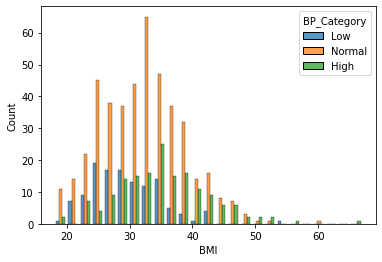

In [17]:
##Exploratory Data Analysis

#RQ: BloodPressure is not dependent on patient's BMI or Age
import seaborn as sns

sns.histplot(x="BMI", hue="BP_Category", data=df, multiple="dodge", shrink=0.75)

<AxesSubplot:xlabel='BMI', ylabel='Density'>

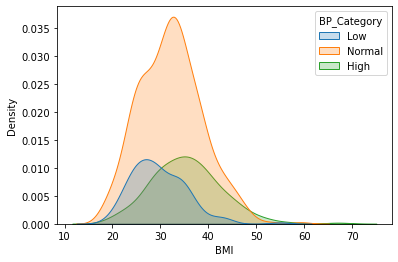

In [18]:
sns.kdeplot(x='BMI', hue='BP_Category', data=df, shade=True)

<AxesSubplot:xlabel='Age', ylabel='Count'>

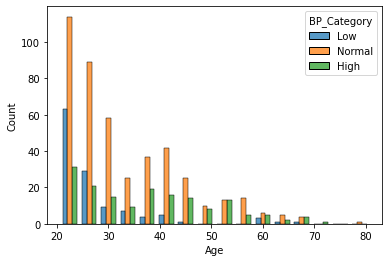

In [19]:
sns.histplot(x="Age", hue="BP_Category", data=df, multiple="dodge", shrink=0.75)

<AxesSubplot:xlabel='Age', ylabel='Density'>

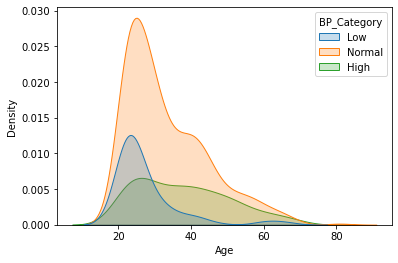

In [20]:
sns.kdeplot(x='Age', hue='BP_Category', data=df, shade=True)

In [21]:
df.head(5)

Pregnancies  Glucose  BloodPressure BP_Category  Insulin   BMI  \
0            6      148             72      Normal        0  33.6   
1            1       85             66      Normal        0  26.6   
2            8      183             64      Normal        0  23.3   
3            1       89             66      Normal       94  28.1   
4            0      137             40         Low      168  43.1   

   DiabetesPedigreeFunction  Age Age_Category  Outcome  
0                     0.627   50       Middle        1  
1                     0.351   31        Young        0  
2                     0.672   32        Young        1  
3                     0.167   21        Young        0  
4                     2.288   33        Young        1

In [22]:
#Correlation Matrix
df.iloc[:,[2,5,7]].corr()

BloodPressure       BMI       Age
BloodPressure       1.000000  0.289230  0.325947
BMI                 0.289230  1.000000  0.024689
Age                 0.325947  0.024689  1.000000

In [23]:
#Power Analysis
#Estimate sample size via multiple power analysis given different effect sizes
from statsmodels.stats.power import TTestIndPower
#parameters for power analysis
effect = 0.2    # Cohen'd criteria 0.2 small, 0.5 medium, 0.8 large
alpha = 0.05
power = 0.8

power_analysis = TTestIndPower()
sample_size = power_analysis.solve_power(effect, power=power, nobs1=None, ratio=1.0, alpha=alpha)
print('Sample Size: %.3f' % sample_size)

Sample Size: 393.406


In [24]:
##for ES = 0.5, Sample Size = 63.766; ES = 0.8, Sample Size = 25.525##

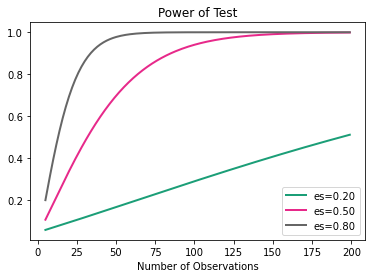

In [42]:
# calculate power curves for varying sample and effect size
from numpy import array
from matplotlib import pyplot
# parameters for power analysis
effect_sizes = array([0.2, 0.5, 0.8])
sample_sizes = array(range(5,200))
# calculate power curves from multiple power analyses

power_analysis.plot_power(dep_var='nobs', nobs=sample_sizes, effect_size=effect_sizes)
pyplot.show()

In [26]:
##T-test
#pip install researchpy
import researchpy as rp

rp.ttest(group1= df['BloodPressure'].loc[df['BMI'] > 24.9], group1_name= "A",
         group2= df['BloodPressure'].loc[df['BMI'] <=24.9], group2_name= "B")      #Justification for 24.


(   Variable      N       Mean         SD        SE  95% Conf.   Interval
 0         A  628.0  73.073248  12.156124  0.485082  72.120666  74.025831
 1         B  101.0  67.980198  12.880978  1.281705  65.437331  70.523065
 2  combined  729.0  72.367627  12.375838  0.458364  71.467753  73.267501,
           Independent t-test   results
 0      Difference (A - B) =     5.0931
 1      Degrees of freedom =   727.0000
 2                       t =     3.8754
 3   Two side test p value =     0.0001
 4  Difference < 0 p value =     0.9999
 5  Difference > 0 p value =     0.0001
 6               Cohen's d =     0.4155
 7               Hedge's g =     0.4150
 8           Glass's delta =     0.4190
 9             Pearson's r =     0.1423)

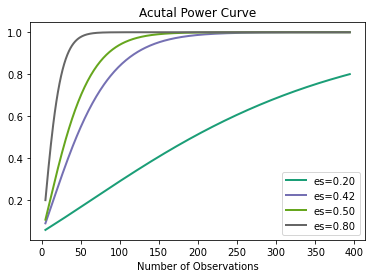

In [51]:
# calculate power curves for varying sample and effect size vs actual effect size
from numpy import array
from matplotlib import pyplot
# parameters for power analysis
effect_sizes2 = array([0.2, 0.42, 0.5, 0.8])
sample_sizes2 = array(range(5,395))
# calculate power curves from multiple power analyses

power_analysis.plot_power(dep_var='nobs', nobs=sample_sizes2, effect_size=effect_sizes2, title = 'Acutal Power Curve')
pyplot.show()

In [27]:
#Once you’ve collected your data, you can calculate and report actual effect sizes in the abstract and the results sections of your paper.
#Actual Effect sizes
#Ratio: ratio of the number of observations in sample 2 relative to sample 1. see description of nobs1 The default for ratio is 1; to solve for ratio given the other arguments it has to be explicitly set to None.

power_actual2 = power_analysis.solve_power(effect_size=0.4155, power=None, nobs1=729, ratio=0.161, alpha=0.05)
print('Actual Stats Power is: %.3f' % power_actual2)

Actual Stats Power is: 0.987


In [28]:
print('Type II error is', 1-power_actual2) #TYPE II ERROR CALCULATION = 1-actual power

Type II error is 0.013451393890543506


In [29]:
#Pingouin ANOVA
aov = pg.anova(data=df, dv='BloodPressure', between='Age_Category', detailed=True)
print(aov)

         Source             SS   DF           MS          F         p-unc  \
0  Age_Category    8539.243998    2  4269.621999  30.105656  2.749360e-13   
1        Within  102962.231997  726   141.821256        NaN           NaN   

        np2  
0  0.076584  
1       NaN  


In [30]:
#Post hoc
sp.posthoc_ttest(df, val_col='BloodPressure', group_col='Age_Category', p_adjust='holm')

Middle         Young       Old
Middle  1.000000e+00  9.733798e-13  0.835372
Young   9.733798e-13  1.000000e+00  0.006168
Old     8.353723e-01  6.168486e-03  1.000000

In [31]:
##ONE-WAY ANCOVA  
from pingouin import ancova
ancova(data=df, dv='BloodPressure', covar='BMI', between='Age_Category')

Source            SS   DF          F         p-unc       np2
0  Age_Category   7799.871976    2  29.960078  3.149852e-13  0.076339
1           BMI   8588.193616    1  65.976199  1.963201e-15  0.083411
2      Residual  94374.038381  725        NaN           NaN       NaN

In [32]:
#Multiple Linear Regression
pg.linear_regression(df[['Age', 'BMI']], df['BloodPressure'])


names       coef        se          T          pval        r2  \
0  Intercept  44.754913  2.294501  19.505291  1.878665e-68  0.185353   
1        Age   0.335903  0.035284   9.520116  2.502262e-20  0.185353   
2        BMI   0.505729  0.060230   8.396629  2.403020e-16  0.185353   

     adj_r2   CI[2.5%]  CI[97.5%]  
0  0.183109  40.250264  49.259563  
1  0.183109   0.266633   0.405173  
2  0.183109   0.387484   0.623975